### 1-Read dataset

In [163]:
#import laibarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# delete warnings
import warnings
warnings.filterwarnings('ignore')

In [165]:
# read data
data=pd.read_csv(r'D:\ML project & tasks\adult.csv')

In [166]:
# display first 5 row of data
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 2-Data Exploration

In [168]:
# display shape of data
data.shape

(48842, 15)

In [169]:
# show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [170]:
# display name of columns
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [171]:
for i in data.columns:
    print(f"column name : {i}")
    print(data[i].value_counts())
    print('--'*40)

column name : age
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
--------------------------------------------------------------------------------
column name : workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
--------------------------------------------------------------------------------
column name : fnlwgt
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64
--------------------------------------------------------------------------------
column name : education
education
HS-grad         15784
Some-college  

In [172]:
for i in data.columns:
    print(f"column name : {i}")
    print(data[i].unique())
    print('--'*40)

column name : age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
--------------------------------------------------------------------------------
column name : workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------------------------------------
column name : fnlwgt
[226802  89814 336951 ... 129912 255835 257302]
--------------------------------------------------------------------------------
column name : education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
--------------------------------------------------------------------------------
column name : educational

In [173]:
# find palace of ? value
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [174]:
# replace ? with nan
data[['workclass','occupation','native-country']]=data[['workclass','occupation','native-country']].replace('?',np.nan)

In [175]:
# find palace of ? value
data.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [176]:
# check missing values
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [177]:
# check duplicated
data.duplicated().sum()

52

### 3-Data Preprocessing

In [179]:
# delete Missing value
data.dropna(how='any',inplace=True)

In [180]:
# check missing values
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [181]:
# delete duplicated value
data.drop_duplicates(inplace=True)

In [182]:
# check duplicated
data.duplicated().sum()

0

In [183]:
# get catogrical column
catogrical=[]
for i in data.columns:
    if data[i].dtype=='object':
        catogrical.append(i)
print(catogrical)        

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [184]:
# encoding data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in catogrical:
    data[i]=encoder.fit_transform(data[i])

In [185]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [186]:
# plot corrlation to select strong feature between input and output
corr=data.corr()

In [187]:
corr

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.085825,-0.075590,-0.003706,0.037269,-0.271265,-0.004511,-0.247572,0.024179,0.081920,0.079649,0.059258,0.101604,-0.003645,0.236839
workclass,0.085825,1.000000,-0.034972,0.017858,0.040771,-0.033152,0.017528,-0.065081,0.049799,0.069634,0.034523,0.008201,0.051378,0.003804,0.015644
fnlwgt,-0.075590,-0.034972,1.000000,-0.025239,-0.041992,0.033029,-0.002184,0.009828,-0.029282,0.027374,-0.004118,-0.004359,-0.018712,-0.060849,-0.007227
education,-0.003706,0.017858,-0.025239,1.000000,0.347561,-0.041477,-0.033547,-0.013249,0.011630,-0.027655,0.029910,0.016894,0.061125,0.077491,0.081178
educational-num,0.037269,0.040771,-0.041992,0.347561,1.000000,-0.064822,0.089713,-0.088604,0.031784,0.003455,0.126982,0.081719,0.146463,0.092158,0.332981
marital-status,-0.271265,-0.033152,0.033029,-0.041477,-0.064822,1.000000,0.016346,0.180410,-0.070318,-0.119996,-0.042356,-0.034744,-0.183007,-0.022291,-0.192499
occupation,-0.004511,0.017528,-0.002184,-0.033547,0.089713,0.016346,1.000000,-0.051718,0.000037,0.056853,0.019412,0.015228,0.016311,-0.002885,0.049752
relationship,-0.247572,-0.065081,0.009828,-0.013249,-0.088604,0.180410,-0.051718,1.000000,-0.118496,-0.583139,-0.056853,-0.058470,-0.259112,-0.007231,-0.253362
race,0.024179,0.049799,-0.029282,0.011630,0.031784,-0.070318,0.000037,-0.118496,1.000000,0.089154,0.014110,0.021003,0.044826,0.124537,0.070883
gender,0.081920,0.069634,0.027374,-0.027655,0.003455,-0.119996,0.056853,-0.583139,0.089154,1.000000,0.047471,0.046485,0.231392,-0.004267,0.215741


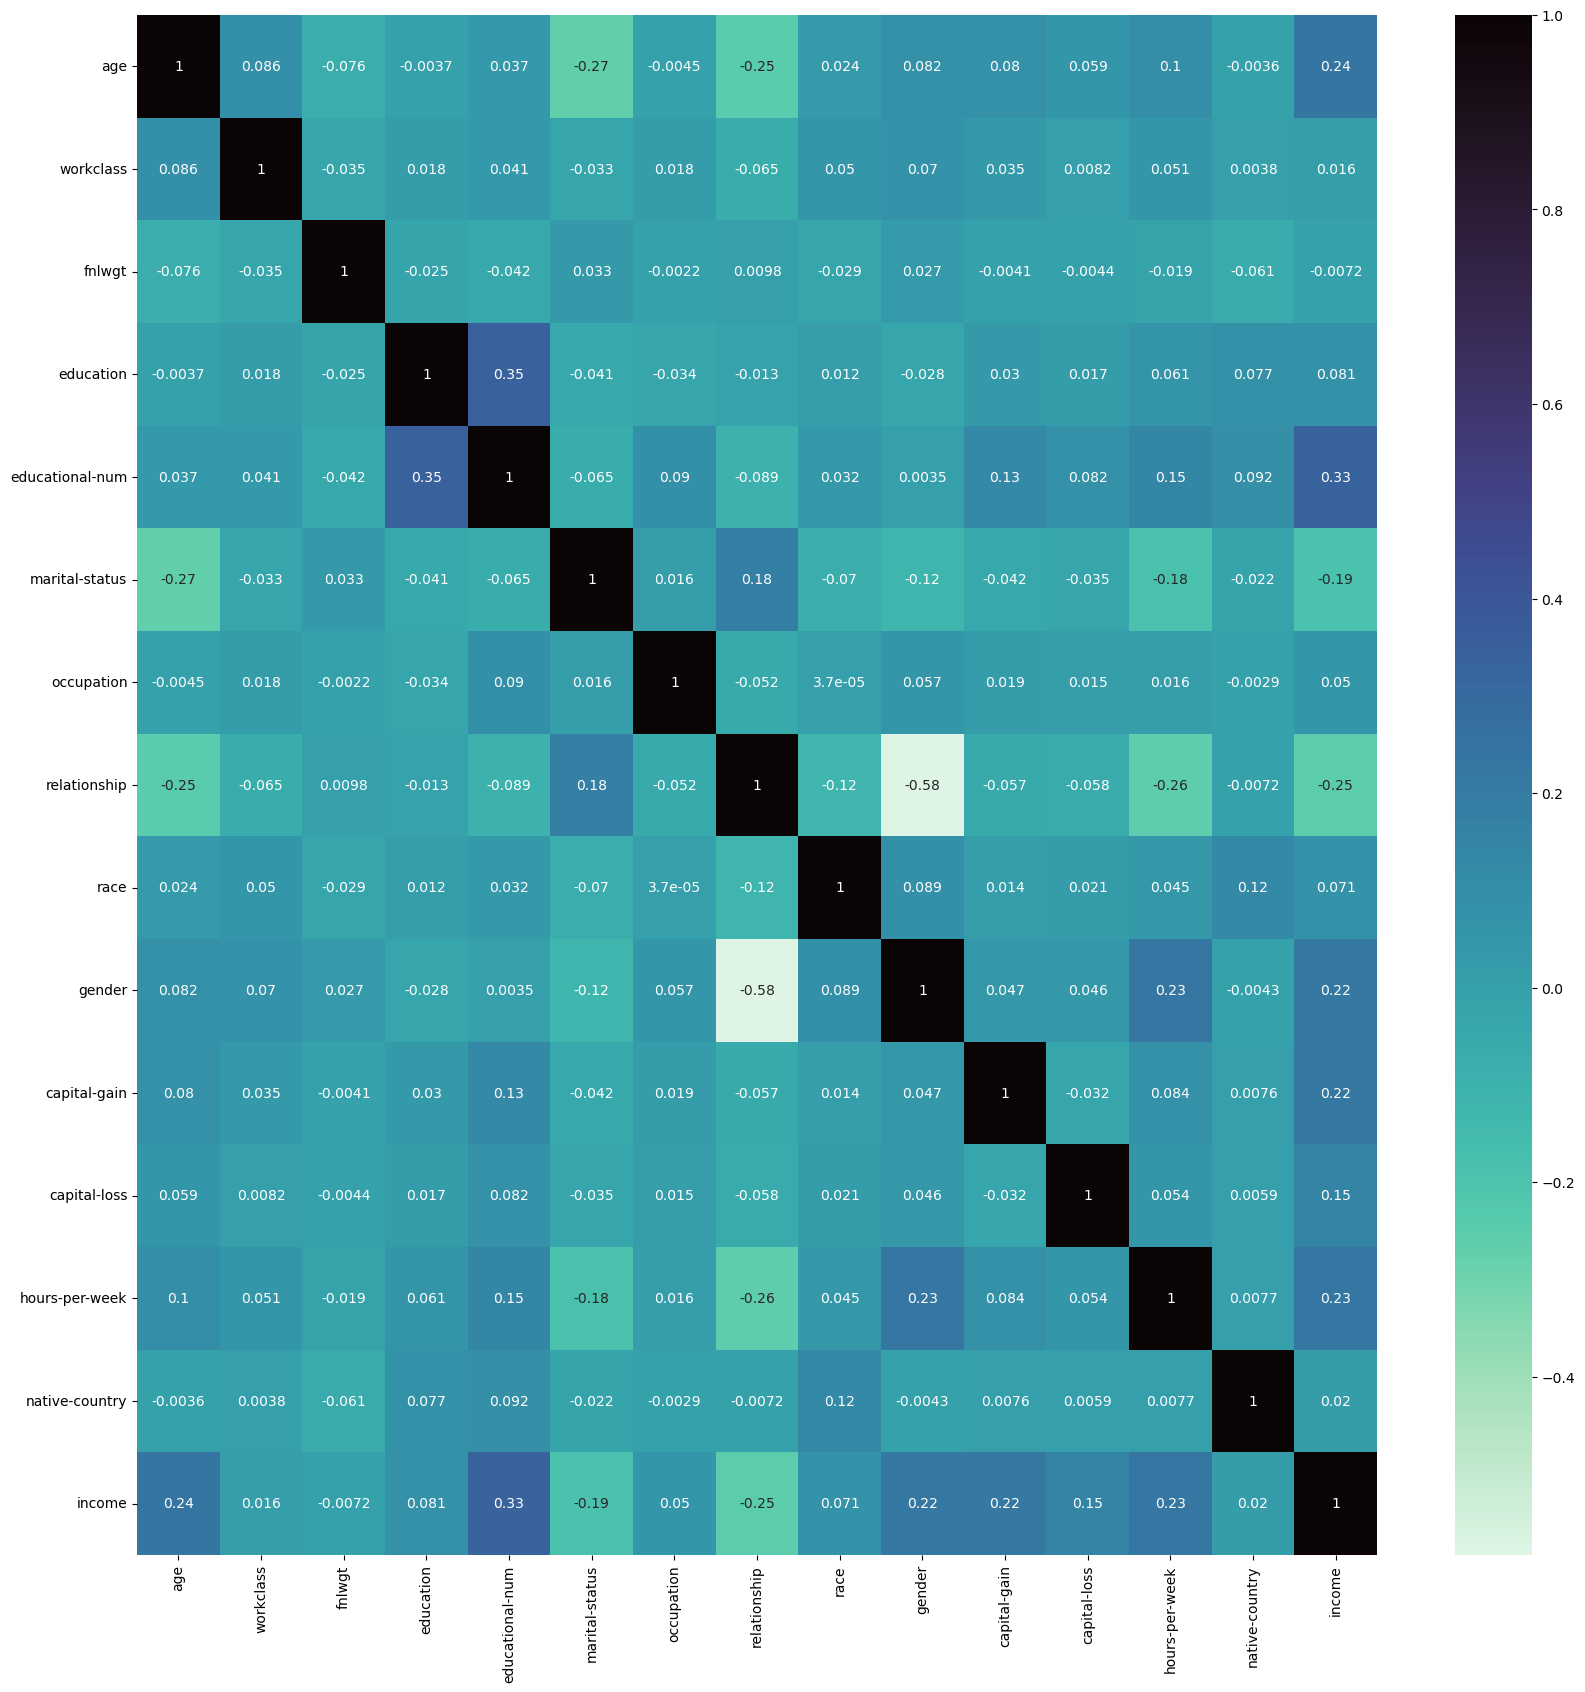

In [188]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='mako_r')
plt.show()

### 4-Data Visualization

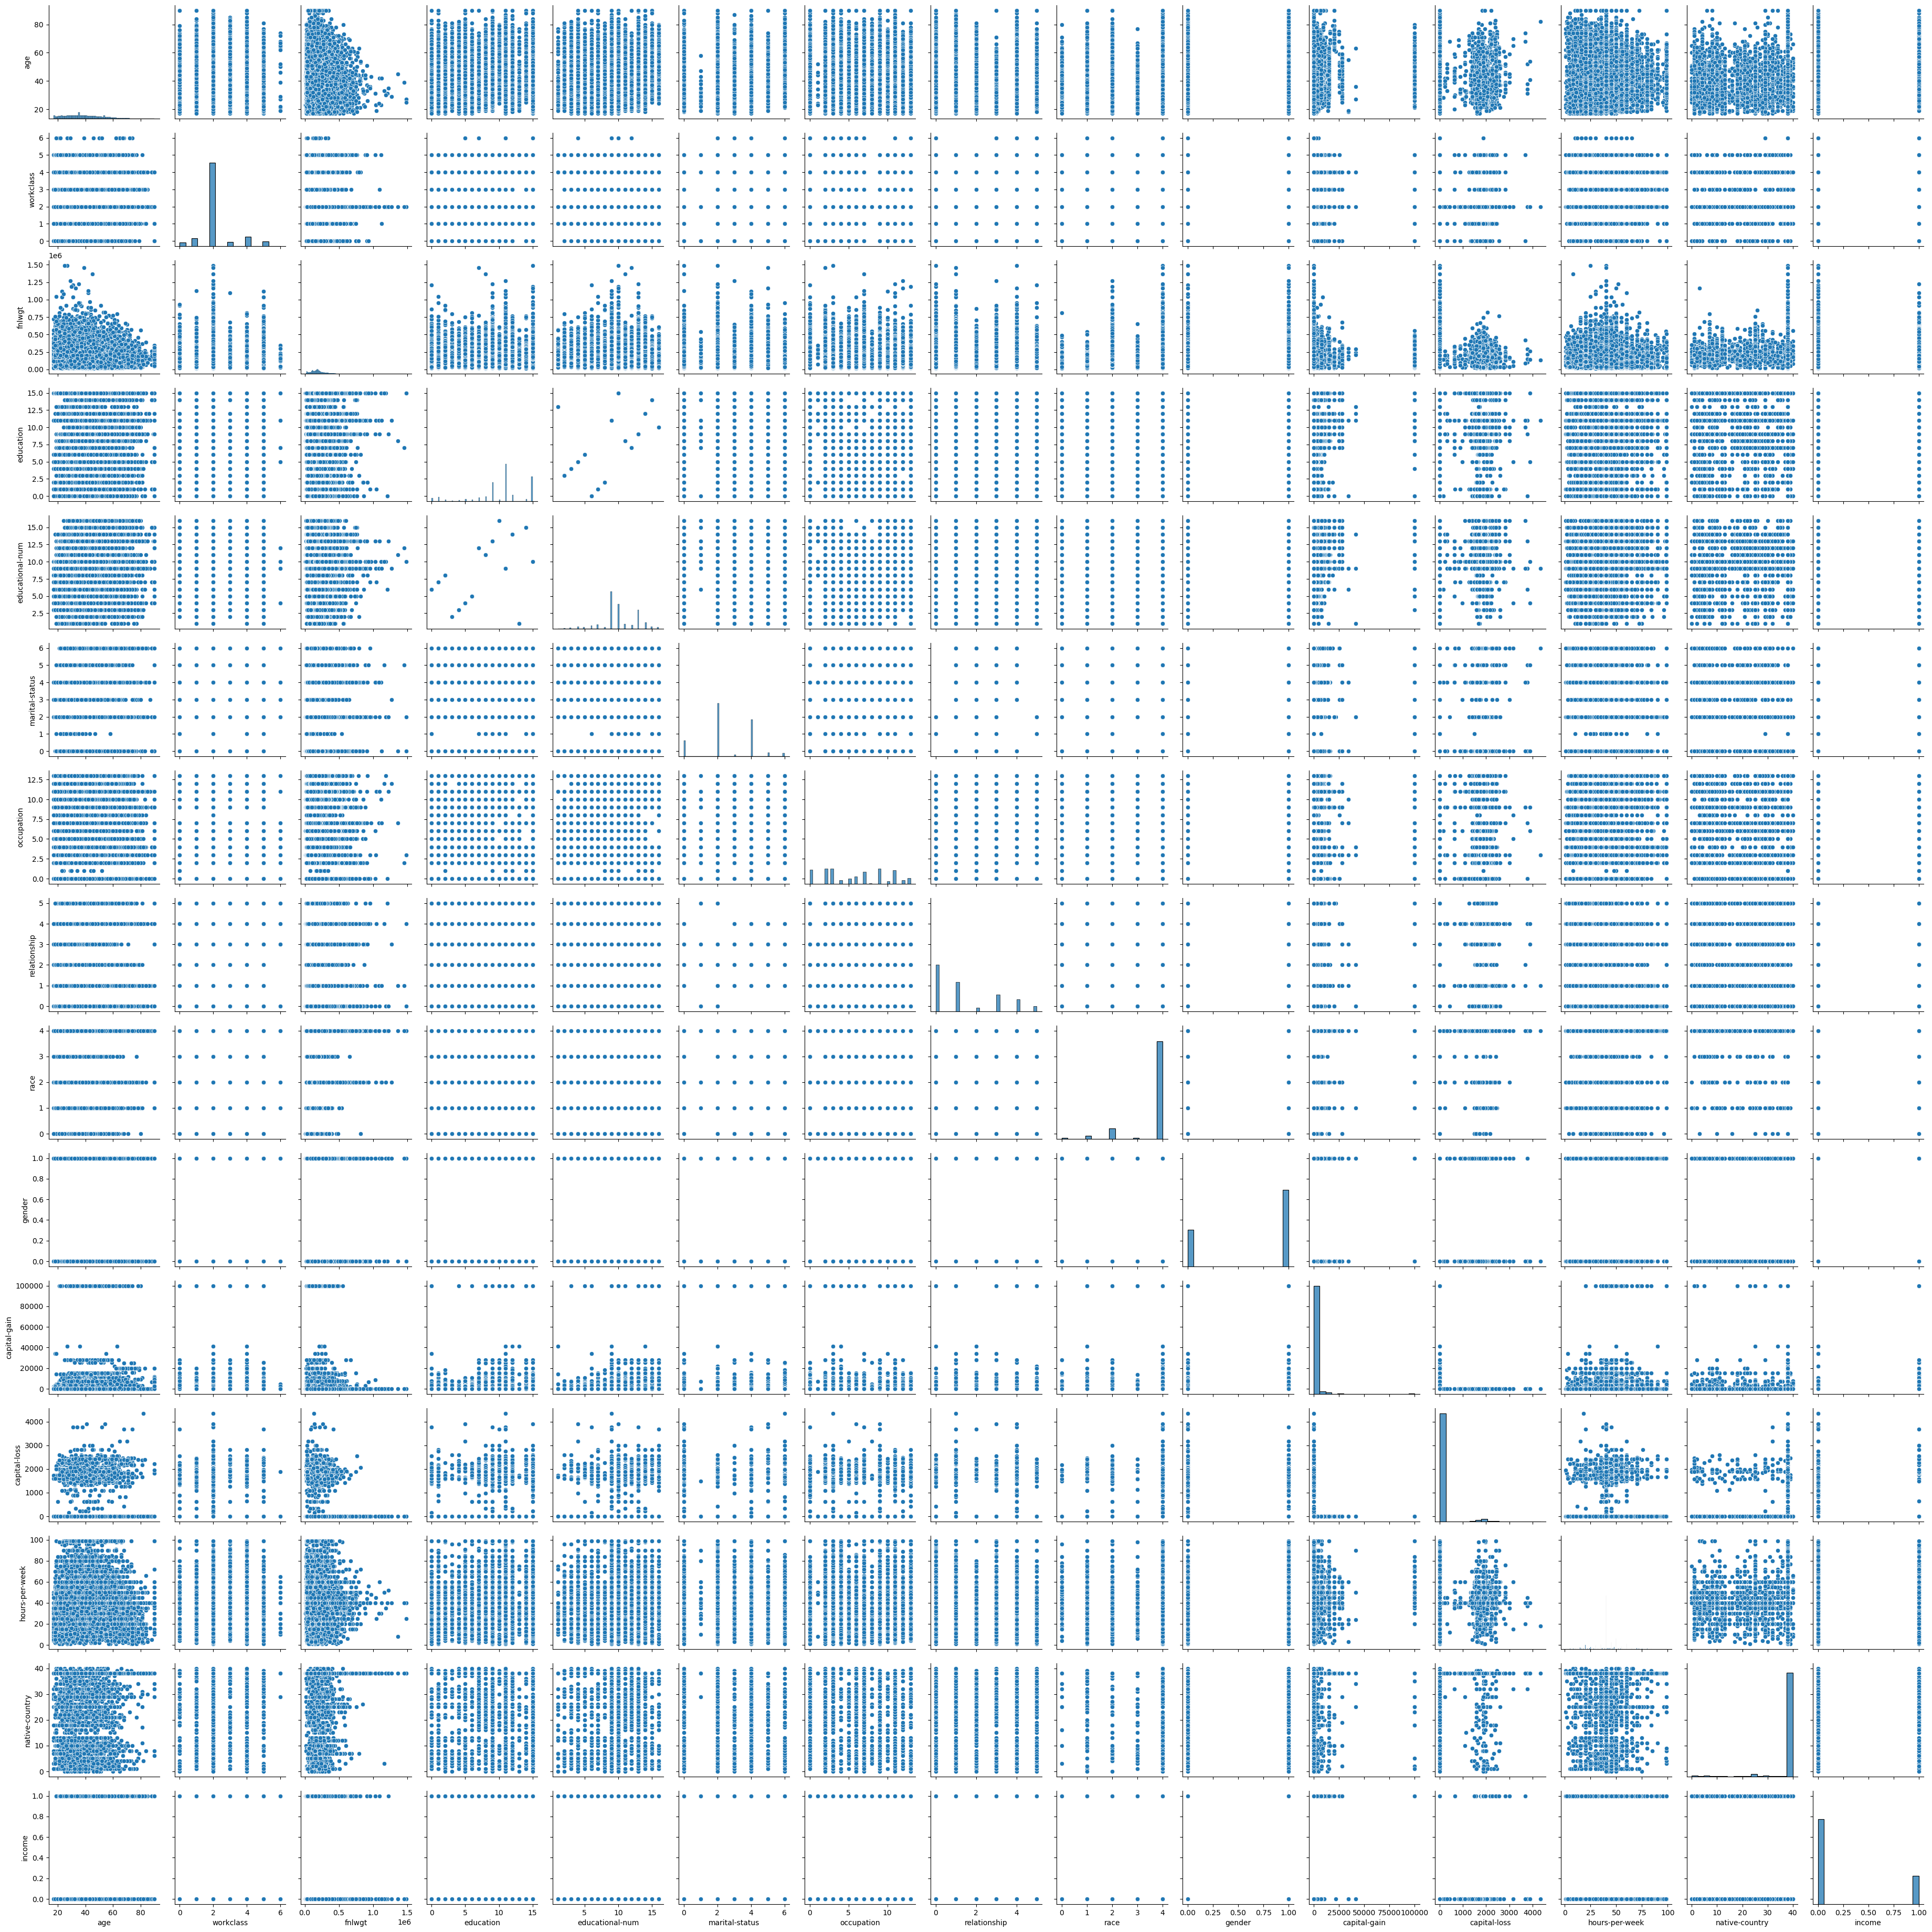

In [190]:
sns.pairplot(data)
plt.show()

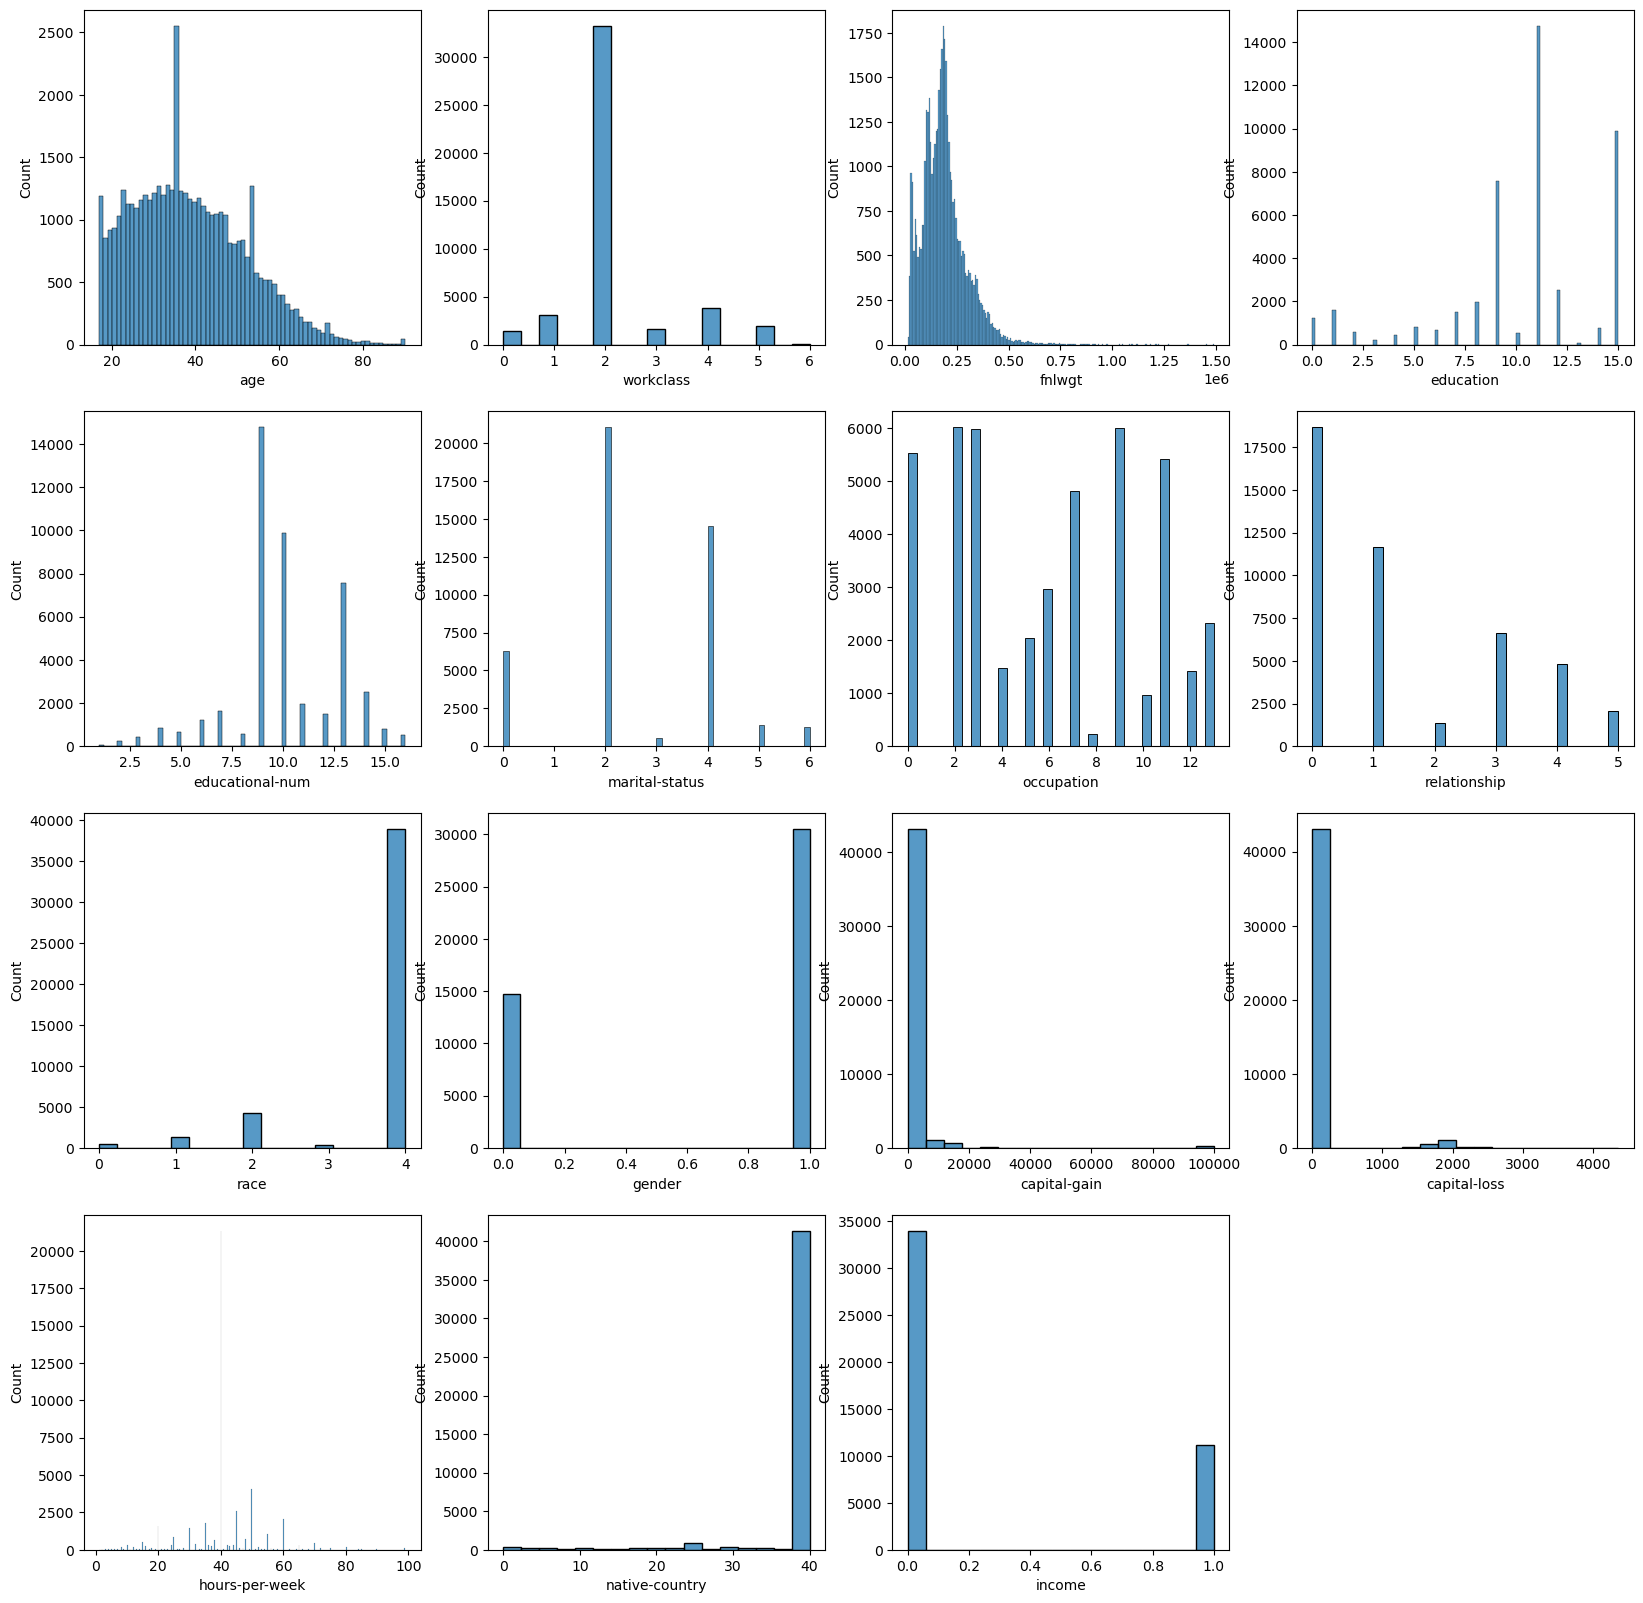

In [191]:
plt.figure(figsize=(20,20))
s=1
for i in data.columns:
    plt.subplot(4,4,s)
    sns.histplot(data[i])
    s+=1

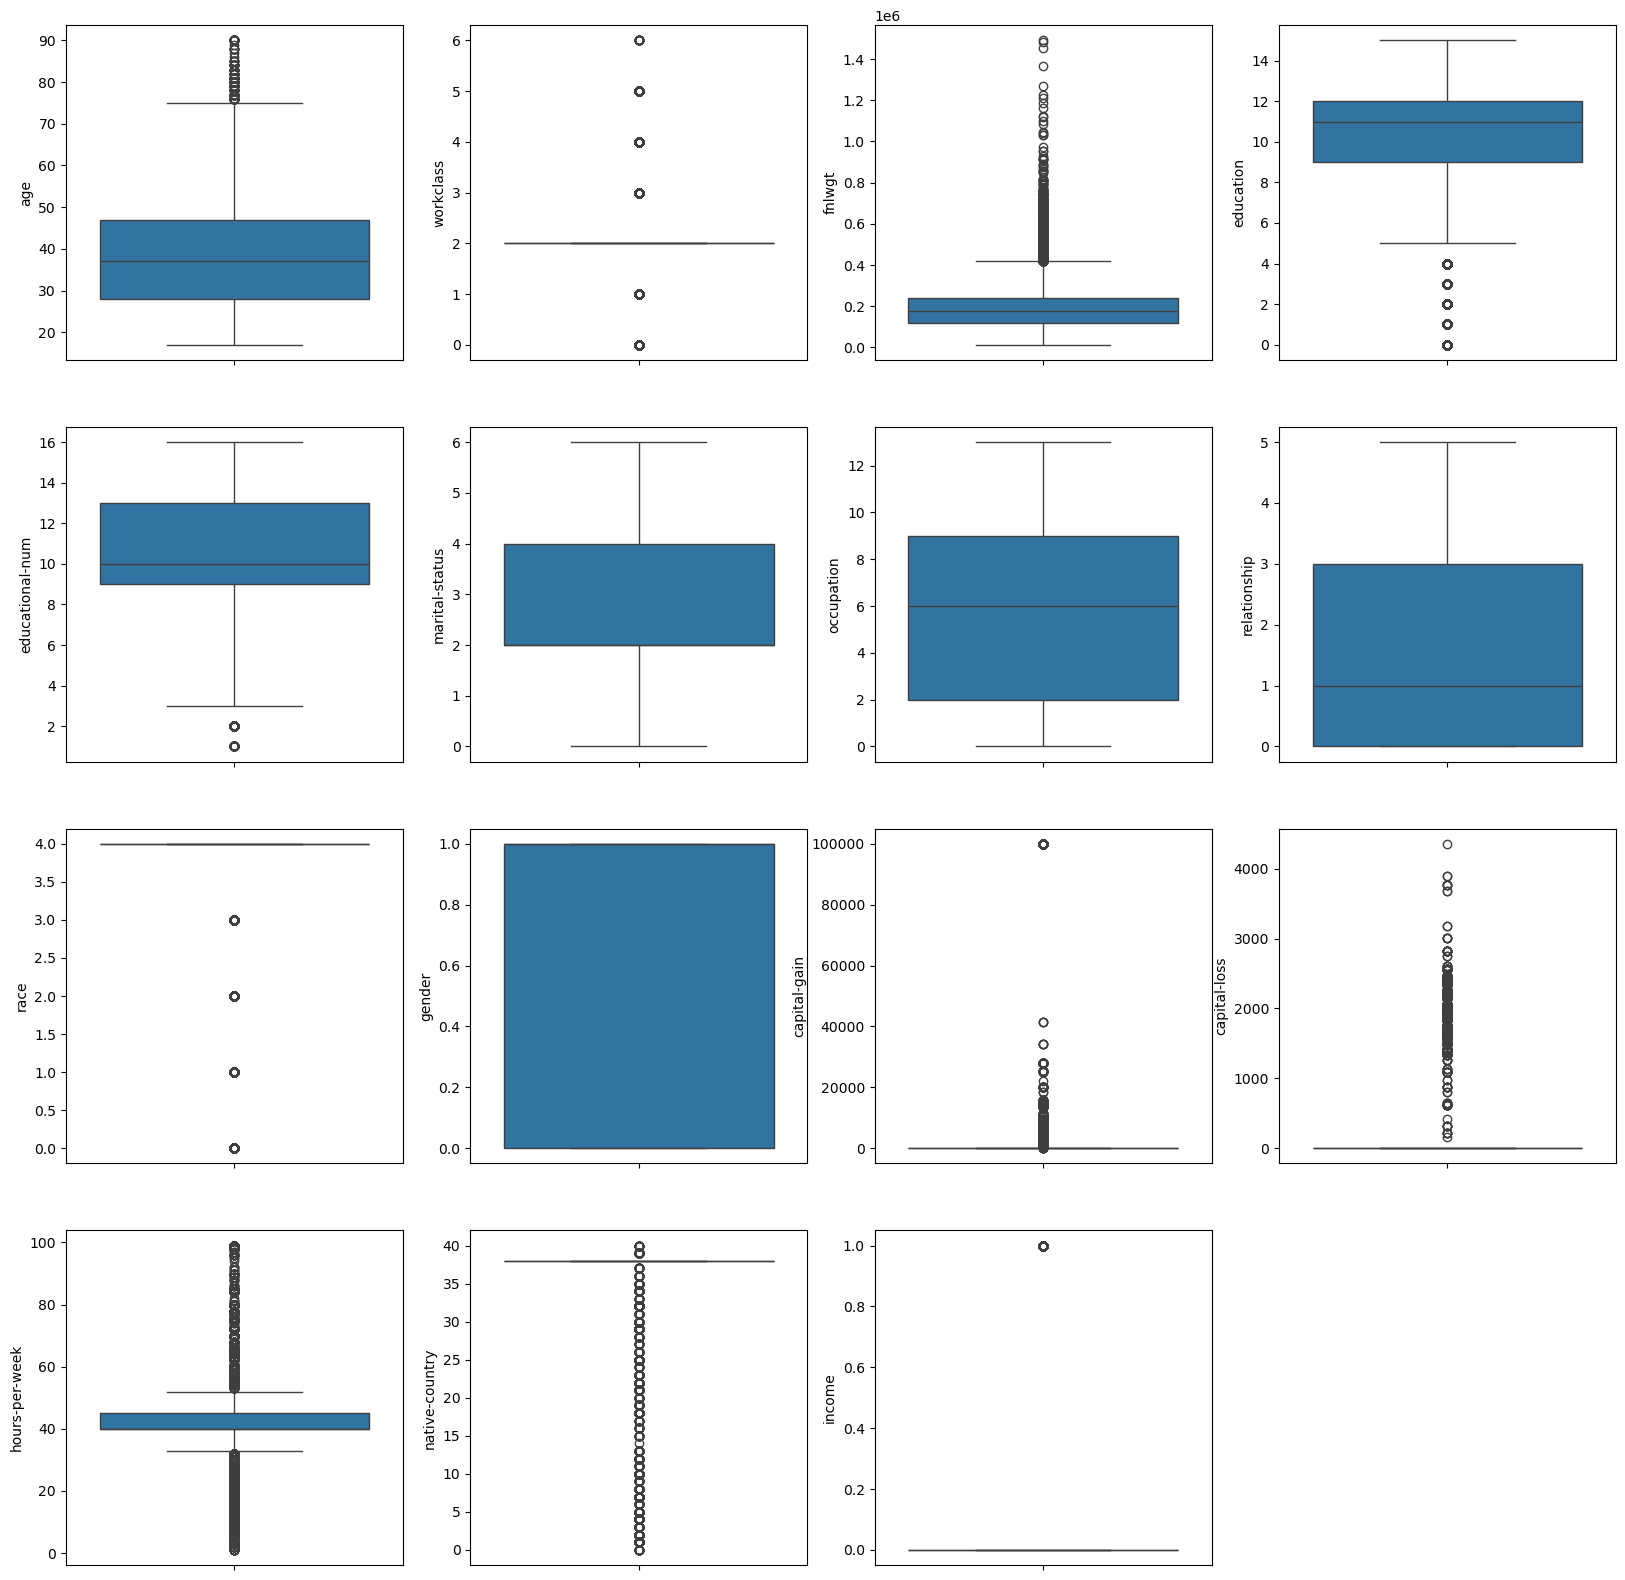

In [192]:
plt.figure(figsize=(20,20))
s=1
for i in data.columns:
    plt.subplot(4,4,s)
    sns.boxplot(data[i])
    s+=1

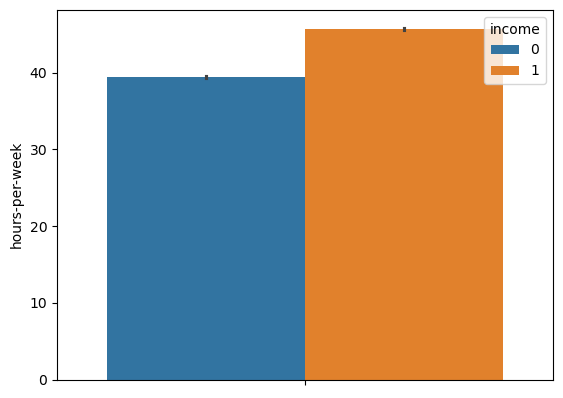

In [193]:
sns.barplot(y=data['hours-per-week'],hue=data['income'])
plt.show()

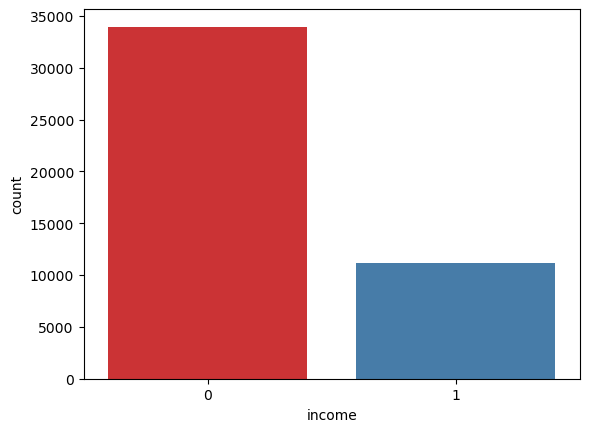

In [194]:
sns.countplot(x=data['income'],palette='Set1')
plt.show()

### 5-Model

In [196]:
# split data into feature(x) and target(y)
x=data.drop(['income'],axis=1)
y=data['income']

In [197]:
# split data into data_train and data_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True,random_state=42)

In [198]:
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)

x_train shape : (36140, 14)
y_train shape : (36140,)


In [199]:
print('x_test shape :',x_test.shape)
print('y_test shape :',y_test.shape)

x_test shape : (9035, 14)
y_test shape : (9035,)


In [200]:
# show maximum value in columns
np.max(x_train,axis=0)

age                     90
workclass                6
fnlwgt             1490400
education               15
educational-num         16
marital-status           6
occupation              13
relationship             5
race                     4
gender                   1
capital-gain         99999
capital-loss          4356
hours-per-week          99
native-country          40
dtype: int64

In [201]:
# show miximum value in columns
np.min(x_train,axis=0)

age                   17
workclass              0
fnlwgt             13492
education              0
educational-num        1
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         1
native-country         0
dtype: int64

In [202]:
cols=x_train.columns

In [203]:
# scaling of data
from sklearn.preprocessing import MinMaxScaler

Scaler=MinMaxScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [204]:
x_train=pd.DataFrame(x_train,columns=cols)

In [205]:
x_test=pd.DataFrame(x_test,columns=cols)

In [206]:
x_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.342466,0.333333,0.066821,0.733333,0.533333,0.333333,0.461538,1.0,1.0,0.0,0.0,0.000000,0.397959,0.95
1,0.041096,0.333333,0.069969,0.733333,0.533333,0.666667,0.461538,0.6,1.0,1.0,0.0,0.000000,0.428571,0.95
2,0.315068,0.333333,0.178592,0.600000,0.800000,0.000000,0.230769,0.2,1.0,1.0,0.0,0.587466,0.551020,0.95
3,0.068493,0.333333,0.046766,1.000000,0.600000,0.666667,0.846154,0.6,1.0,1.0,0.0,0.000000,0.397959,0.95
4,0.232877,0.166667,0.128131,0.733333,0.533333,0.333333,0.769231,0.0,1.0,1.0,0.0,0.000000,0.397959,0.95


In [207]:
x_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.027397,0.333333,0.117590,1.000000,0.6,0.666667,0.846154,0.6,1.0,0.0,0.0,0.0,0.173469,0.95
1,0.164384,0.333333,0.099731,1.000000,0.6,0.333333,0.461538,0.0,1.0,1.0,0.0,0.0,0.459184,0.95
2,0.438356,0.166667,0.129246,0.066667,0.4,0.000000,0.538462,0.6,1.0,0.0,0.0,0.0,0.602041,0.95
3,0.054795,0.333333,0.114174,1.000000,0.6,0.666667,0.538462,0.6,1.0,1.0,0.0,0.0,0.142857,0.95
4,0.191781,0.333333,0.141267,1.000000,0.6,0.666667,0.000000,0.2,1.0,0.0,0.0,0.0,0.428571,0.95


In [249]:
from sklearn.neighbors import KNeighborsClassifier

In [251]:
# calling model
knn=KNeighborsClassifier()

In [253]:
# fit model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [255]:
# predict model
y_pred=knn.predict(x_test)

In [257]:
print('first 10 value of y predict =',y_pred[:10])
print(' ')
print('first 10 value of y actual =',y_test.values[:10])

first 10 value of y predict = [0 0 0 0 0 0 1 0 0 0]
 
first 10 value of y actual = [0 0 0 0 0 0 1 0 0 0]


In [259]:
# evaluate model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [261]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6842
           1       0.65      0.57      0.61      2193

    accuracy                           0.82      9035
   macro avg       0.76      0.74      0.75      9035
weighted avg       0.82      0.82      0.82      9035



In [263]:
# test score
y_pred_test=knn.predict(x_test)
print('test score =',accuracy_score(y_test,y_pred_test))

test score = 0.8214720531267294


In [265]:
# train score
y_pred_train=knn.predict(x_train)
print('test score =',accuracy_score(y_train,y_pred_train))

test score = 0.8742114001106807


In [268]:
cm=confusion_matrix(y_test,y_pred)

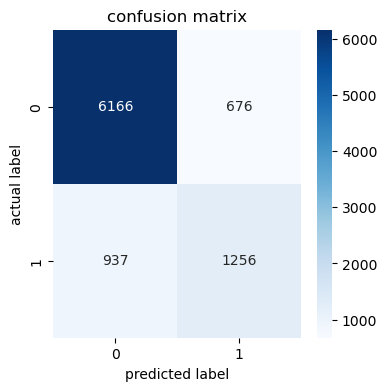

In [269]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

In [281]:
score = []
for i in range(1,40):
    #model
    knn_model = KNeighborsClassifier(n_neighbors = i)

    #fit
    knn_model.fit(x_train, y_train)
    score.append(knn_model.score(x_test, y_test))

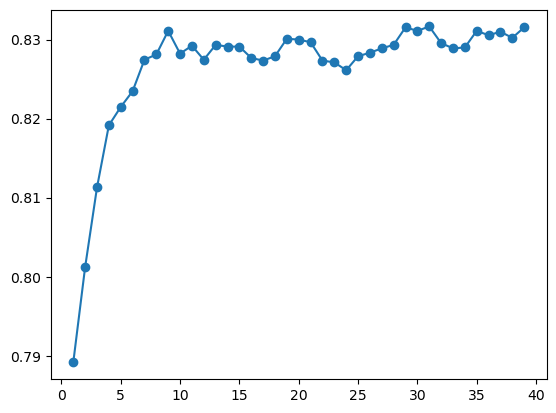

In [282]:
plt.plot(range(1,40), score,marker='o')

In [285]:
# n_neighbors=30
knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(x_train, y_train)
y_pred_m = knn_model.predict(x_test)

In [287]:
print(classification_report(y_test,y_pred_m))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6842
           1       0.69      0.55      0.61      2193

    accuracy                           0.83      9035
   macro avg       0.78      0.74      0.75      9035
weighted avg       0.82      0.83      0.82      9035



In [289]:
# use grid search
from sklearn.model_selection import GridSearchCV

In [291]:
# calling
knn=KNeighborsClassifier()

params={
    'n_neighbors': list(range(1,40)),
    'p':[1,2] #1: manhattan 2:euclidien
}

In [293]:
grid=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='accuracy')

In [295]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             scoring='accuracy')

In [296]:
grid.best_params_

{'n_neighbors': 31, 'p': 1}

In [297]:
grid.best_score_

0.8351134477033758

In [301]:
# use best parameter on knn model
knn_b=KNeighborsClassifier(n_neighbors= 31, p= 1)
knn_b.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=31, p=1)

In [303]:
y_pred_b = knn_b.predict(x_test)

In [305]:
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6842
           1       0.69      0.57      0.62      2193

    accuracy                           0.83      9035
   macro avg       0.78      0.74      0.76      9035
weighted avg       0.83      0.83      0.83      9035



In [307]:
# test score
print('test score =',accuracy_score(y_test,y_pred_b))

test score = 0.8332042058660764


In [ ]:
# train score
y_pred_t=knn.predict(x_train)
print('test score =',accuracy_score(y_train,y_pred_t))